In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC   
import sys, os
sys.path.append("..")
from src.features import build_features as bf
from src.models import train_model as tm
from src.visualization import visualize as vs
#sys.path.append(os.path.realpath())+ "/../src/features"
#sys.path.extend([f'./{name}' for name in os.listdir(".") if os.path.isdir(name)])

In [2]:
data = pd.read_csv('/home/farzaneh/DataScientist/LearnPython/Diabetes/diabetes/data/processed/diabetes_data_upload.csv', header = 0)

In [3]:
preprocessor = bf.Preprocessor(data)

Die Daten sind in Ordnung.


In [4]:
X_train, X_test, y_train, y_test, X, y = preprocessor.get_data()

In [5]:
count_positive, count_negative, percentage_positive, percentage_negative = preprocessor.statistica()

In [6]:
# algo = ["DT","rf","knn","svm"]
algo="DT"
trained_model, model_confusion_mat = tm.train_model(X_train, X_test, y_train, y_test, algo)

Model DT successfully trained with an accuracy of 93.27% 


In [7]:
if algo == "svm":
    best_model_parameters = SVC(C=0.1, gamma='auto', kernel='poly', probability=True)
else:
    best_model_parameters = tm.optimize_model(trained_model, X_train, y_train, algo)

Model DT successfully optimized with the best parameters of {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}.


In [8]:
best_model, best_model_confusion_mat = tm.kfoldevaluate_optimzed_model(algo, best_model_parameters, X, y, X_train, X_test, y_train, y_test)

Model DecisionTreeClassifier(max_depth=5, random_state=14) successfully trained with an accuracy of 94.23% 
K_fold Accuracy of DT with best parameters is 95.19% 


In [9]:
fpr, tpr, threshold, roc_auc = tm.roc_vorbereitung(best_model, X_test, y_test)

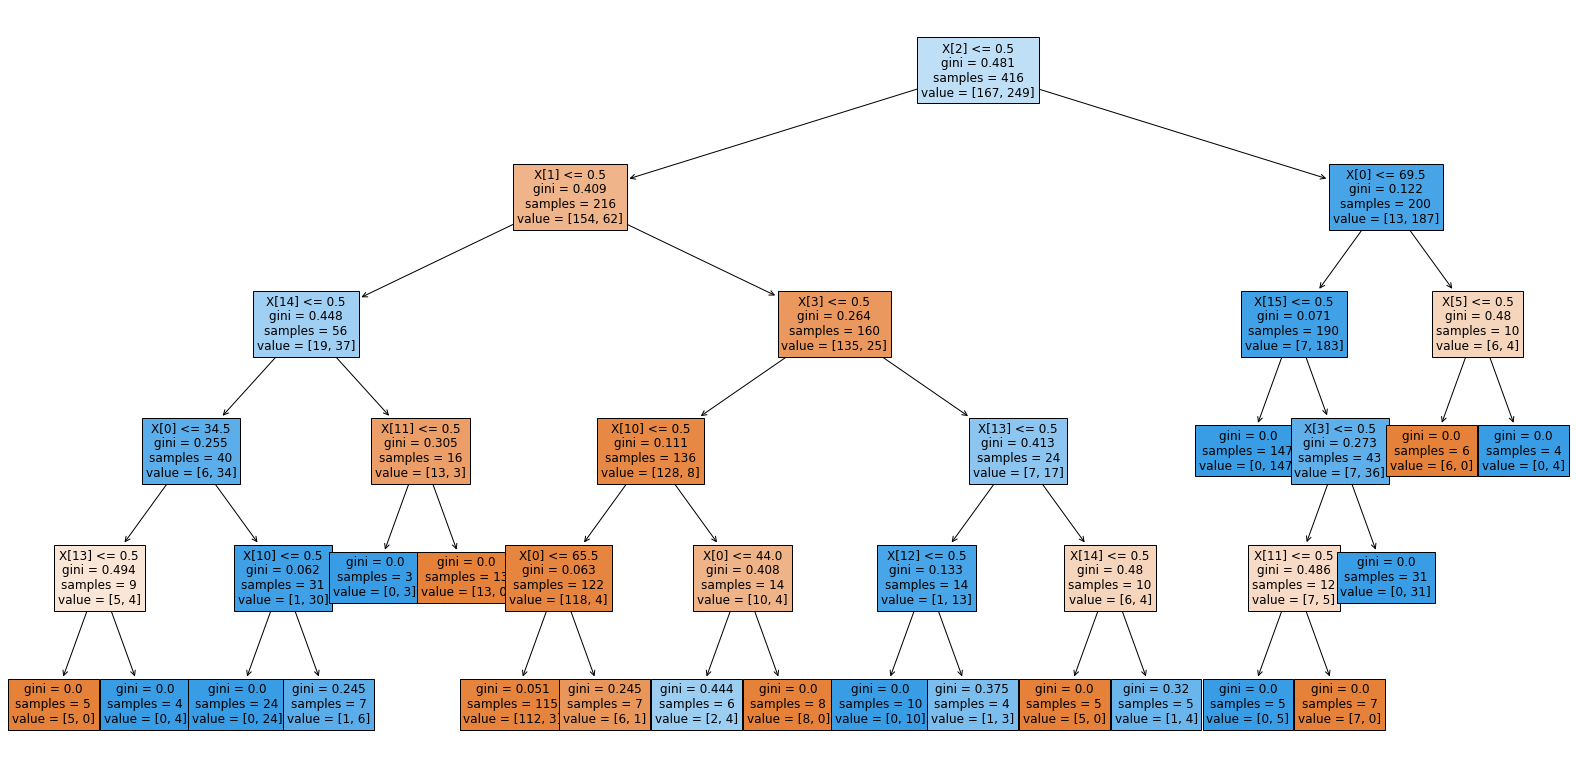

In [10]:
vs.pl_ROC(algo, roc_auc, fpr, tpr)
if algo=="DT": vs.Diabetes_tree(best_model, X)